### 내외부 판별

- 어떤 점의 관하여 다각형의 내외부 판별

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from shapely.geometry import *
import random as rd
import math

다각형 관련 함수 from Making_Polygon and Centroid

In [8]:
# 다각형의 점 만들기(랜덤범위1, 랜덤범위2, 점 개수)
def making_pts(r1, r2, n):
    pts = []
    while len(pts) < n:
        x, y = rd.randint(r1, r2), rd.randint(r1, r2)
        if (x, y) not in pts:
            pts.append((x, y))
    return pts

# 각도 계산(두 점)
def calculating_Angle(pt1, pt2):
    dx, dy = (pt2[0] - pt1[0]), (pt2[1] - pt1[1])
    if dx >= 0 and dy == 0:
        angle = 0
    else:
        angle = math.atan2(dy, dx) * 180 / math.pi
    return angle

# 단순 다각형 만들기(포인트 리스트)
def making_Polygon(pts):
    angle_list = []
    result = [0 for _ in range(len(pts))]
    pts = sorted(pts, key=lambda x: (x[1], x[0]))
    standard_pt = pts[0]
    for pt in pts[1:]:
        angle_of_pt = calculating_Angle(standard_pt, pt)
        angle_list.append([angle_of_pt, pt])
    angle_list = sorted(angle_list, key = lambda x: (x[0], x[1][0], -x[1][1]))
    result[0] = standard_pt
    for idx, i in enumerate(angle_list):
        result[idx+1] = i[1]
    return result

# 다각형의 면적 구하기(포인트 리스트)
def area_Polygon(pts):
    poly_area = 0
    for i in range(len(pts)-1):
        poly_area += (pts[i][0] * pts[i+1][1]) - (pts[i+1][0] * pts[i][1])
    return abs(poly_area) / 2

# 다각형의 무게중심 구하기(포인트 리스트)
def centroid_Polygon(pts):
    A = area_Polygon(pts)
    x = 0
    y = 0
    for i in range(len(pts)-1):
        x += (pts[i][0] + pts[i+1][0]) * ((pts[i][0] * pts[i+1][1]) - (pts[i+1][0] * pts[i][1]))
        y += (pts[i][1] + pts[i+1][1]) * ((pts[i][0] * pts[i+1][1]) - (pts[i+1][0] * pts[i][1]))
    centroid_x = 1/6 / A * x 
    centroid_y = 1/6 / A * y
    return [centroid_x, centroid_y]

#### 다각형 내부의 점 판단 방법

1. The Crossing Number (cn) 교차 횟수 방법 :
점 p에서 출발한 ray or vector(직선, 광선)이 폴리곤 경계선을 몇번 교차해 가는지 세는 것. "교차해간 경계선 수 가 짝수 일때 이 점은 바깥에 존재한다"라고 판단한다. 홀수 일땐 점은 내부에 있다고 판단한다.

2. The Winding Number (wn) 감싸는 횟수 방법 : 
점 p를 폴리곤이 몇번 감아 도는지 세는것, "감싸도는 횟수" wn = 0일때에만 점은 바깥에 존재한다. 다른 경우, 점은 내부에 있다고 판단한다.

#### 두 방법의 약점

wn의 경우, 복잡한 닫힌 폴리곤 내부에 점이 있는지도 정확하게 판단하지만 도넛모양 처럼 2개 이상의 폴리곤이 감싸고 있고 도넛의 안쪽의 외부영역에 대해서도 내부로 판단한다.

cn의 경우, ray or vector가 폴리곤의 꼭지점을 통과할 경우 일반적인 방법으로는 꼭지점에 걸친 2선분에 대해 교차한다고 판단하므로 이를 처리해줘야 한다. 동시에 선분이 ray와 기울기가 같은 수평일 경우에도 이를 어떻게 판단해야 할지 정해줘야 한다.<br>

경계를 교차할 때 규칙
- 위쪽 경계선에는 처음 끝점은 포함되고 마지막 끝점은 제외된다.(단, 위쪽과 아래쪽을 어떻게 구분할지에 대한 방법론 필요)
- 아래쪽 경계선에는 처음 끝점은 제외되고 마지막 끝점은 포함된다.
- 수평 경계선들은 다루지 않는다.
- 경계선-ray의 교차 지점은 정확하게 점 p의 오른쪽 방향에서만 존재해야 한다. (오른쪽 경계선에 걸친 점들은 외부로 취급되고, 왼쪽 경계에 걸친 점들은 내부로 취급되는 결과를 줌)

#### 결론

도넛형태가 아닌 닫힌 폴리곤의 모든 경우에 wn이 보다 정확하므로, 임의의 폴리곤에 대해 점이 내외부에 있는지 판별할때는 wn 알고리즘이 우선 고려되어야 한다.
wn을 먼저 적용한 뒤, wn 검토 값이 2이상일때 cn을 적용하여 내외부 판단을 하는것이 가장 정확한 판단이 가능할 것으로 예상된다.

In [135]:
# 교차점 검토 

def location_cross_point(pts):
#     x1, y1, x2, y2, x3, y3, x4, y4 = pts[0][0], pts[0][1], pts[1][0], pts[1][1], pts[2][0], pts[2][1], pts[3][0], pts[3][1]
    x1, y1, x2, y2, x3, y3, x4, y4 = pts[0], pts[1], pts[2], pts[3], pts[4], pts[5], pts[6], pts[7]
    mn = ((x1 - x2)*(y3- y4)) - ((y1 - y2)*(x3 - x4))
    # mn = 0 을 만족하면 두 직선은 평행 또는 일치
    if mn != 0:
        cx = (((x1*y2)-(y1*x2))*(x3-x4) - (x1-x2)*((x3*y4)-(y3*x4))) / mn
        cy = (((x1*y2)-(y1*x2))*(y3-y4) - (y1-y2)*((x3*y4)-(y3*x4))) / mn
        return [cx, cy]
    return False

def ccw(pts):
    x1, y1, x2, y2, x3, y3 = pts[0][0], pts[0][1], pts[1][0], pts[1][1], pts[2][0], pts[2][1]
    cross_product = ((x2-x1)*(y3-y1)) - ((x3-x1)*(y2-y1))
    if cross_product < 0:
        return -1
    elif cross_product > 0:
        return 1
    else:
        return 0

def finding_bigger(pts):
    pts = sorted(pts, key= lambda x: (x[0], x[1]))
    bigger, smaller = pts[1], pts[0]
    return bigger, smaller
    
def angle_of_line(s1, b1):
    if (s1[0]-b1[0]) != 0:
        angle = (s1[1]-b1[1])/(s1[0]-b1[0])
    else:
        angle = 90
    return angle
    
def check_cross(pts):
    pts = pts
    p1, p2, p3, p4 = [pts[0], pts[1]], [pts[2], pts[3]], [pts[4], pts[5]], [pts[6], pts[7]]
    sp, ep = [pts[4], pts[5]], [pts[6], pts[7]]
    v1 = ccw([p1, p2, p3]) * ccw([p1, p2, p4])
    v2 = ccw([p3, p4, p1]) * ccw([p3, p4, p2])
    b1, s1 = finding_bigger([p1, p2])
    b2, s2 = finding_bigger([p3, p4])
    ang1 = angle_of_line(s1, b1)
    ang2 = angle_of_line(s2, b2)
    
    # 두 선분이 동일 선상에 있을 경우
    # ex) [[0,0], [5,0], [6,0], [10,0]]
    if v1 == 0 and v2 == 0 and ang1 == ang2:
        # 두 선분이 동일 선상에 있으면서 두 선분 중 동일한 좌표가 있을경우, 그 좌표가 교차점이 됨
        if b1 == s2:
            intersection_point = b1
        elif b2 == s1:
            intersection_point = b2
        # 두 선분이 동일 선상에 있으면서, 일정부분 겹칠 경우
        elif b2 == b1 or s2 == s1:
            intersection_point = 'Much'
        elif b1 >= s2 and b2 >= s1:
            intersection_point = 'Much'
        else:
            intersection_point = 'None' # 교차하지 않음
    elif v1 <= 0 and v2 <= 0:
        intersection_point = location_cross_point(pts)
    else:
        intersection_point = 'None'
    
    # 교차점이 없거나 다수일 경우
    if intersection_point == 'Much' or intersection_point == 'None':
        return False
    # 교차점이 1개인 경우
    else:
        # 교차점이 시작점일 경우 Ture
        if intersection_point == sp:
            return True
        # 교차점이 끝점일 경우 False
        elif intersection_point == ep:
            return False
        # 교차점이 그 외 위치일 경우 True
        else:
            return True


In [160]:
# Crossing_Number
# 선에 걸칠경우 내부에 속하는것으로
# 교차점 판별에 시작점 혹은 끝점 하나만 들어가게 해야함
# 첫점과 끝점 동일하게

def crossing_number(point, polygon_pts):
    number = 0
    px, py = point.x, point.y
    polygon = Polygon(polygon_pts)
    minx, miny, maxx, maxy = polygon.bounds
    for i in range(len(polygon_pts)-1):
        result = check_cross([px, py, maxx, py, polygon_pts[i][0], polygon_pts[i][1], polygon_pts[i+1][0], polygon_pts[i+1][1]])
        if result == True:
            number += 1
            
    if number % 2 == 1:
        return True, number
    else:
        return False, number

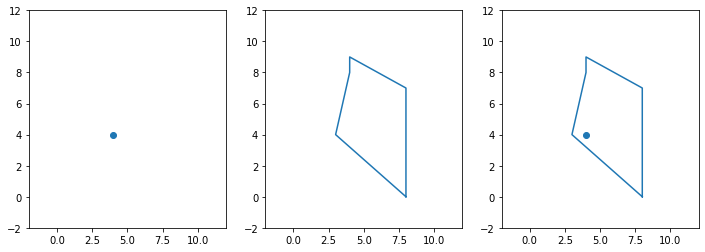

다각형 내부의 점 판단 : True (내부 : True, 외부 : False)


In [156]:
# 랜덤 폴리곤 생성
pts_1 = making_pts(0, 10, 5)
pts_2 = making_Polygon(pts_1)
pts_2.append(pts_2[0])
polygon = Polygon(pts_2)

# 랜덤 점 생성
p = Point(rd.randint(-1, 11), rd.randint(-1, 11))
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
for i in range(3):
    ax[i].set_xlim(-2, 12)
    ax[i].set_ylim(-2, 12)
ax[0].scatter(p.x, p.y)
ax[1].plot(*polygon.exterior.xy)
ax[2].scatter(p.x, p.y)
ax[2].plot(*polygon.exterior.xy)
plt.show()

result = crossing_number(p, pts_2)
print(f'다각형 내부의 점 판단 : {result} (내부 : True, 외부 : False)')

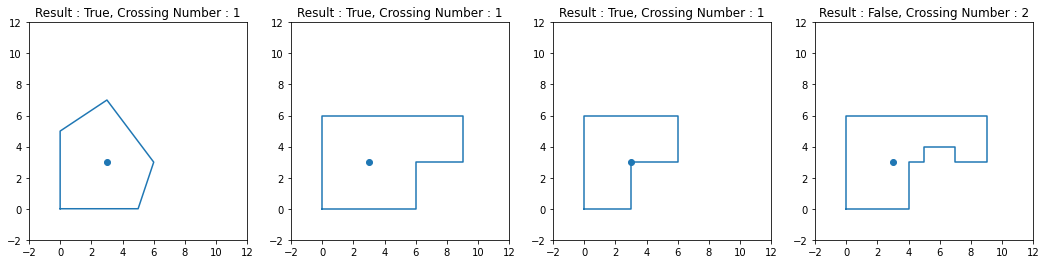

In [165]:
fig, ax = plt.subplots(1, 4, figsize=(18, 4))

pt = Point(3, 3)
polygons = [[[0,0], [5,0], [6,3], [3,7], [0,5], [0,0]],
           [[0,0], [6,0], [6,3], [9,3], [9,6], [0,6], [0,0]],
            [[0,0], [3,0], [3,3], [6,3], [6,6], [0,6], [0,0]],
           [[0,0], [4,0], [4,3], [5,3], [5,4], [7,4], [7,3], [9,3], [9,6], [0,6], [0,0]]]

for i in range(4):
    ax[i].set_xlim(-2, 12)
    ax[i].set_ylim(-2, 12)
    ax[i].scatter(pt.x, pt.y)
    polygon = Polygon(polygons[i])
    ax[i].plot(*polygon.boundary.xy)
    result, number = crossing_number(pt, polygons[i])
    ax[i].set_title(f'Result : {result}, Crossing Number : {number}')

plt.show()

In [172]:
# Winding_Number

def is_left(P0, P1, P2):
    return (P1[0] - P0[0]) * (P2[1] - P0[1]) - (P2[0] - P0[0]) * (P1[1] - P0[1])

def winding_number(point, polygon_pts):
    wn = 0   # the winding number counter
    px, py = point.x, point.y
    point = [px, py]
    
    # repeat the first vertex at end
    # V = tuple(V[:]) + (V[0],)

    for i in range(len(polygon_pts)-1):  
        if polygon_pts[i][1] <= point[1]:
            if polygon_pts[i+1][1] > point[1]: 
                if is_left(polygon_pts[i], polygon_pts[i+1], point) > 0: 
                    wn += 1
        else:
            if polygon_pts[i+1][1] <= point[1]:
                if is_left(polygon_pts[i], polygon_pts[i+1], point) < 0:
                    wn -= 1 
                    
    if wn <= 0 :
        return False, wn
    else:
        return True, wn


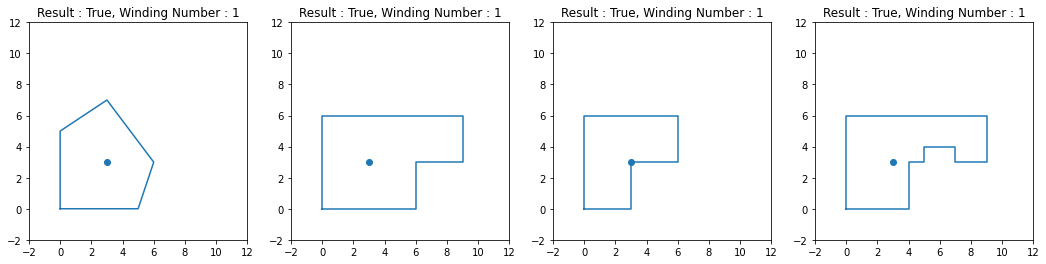

In [188]:
fig, ax = plt.subplots(1, 4, figsize=(18, 4))

pt = Point(3, 3)
polygons = [[[0,0], [5,0], [6,3], [3,7], [0,5], [0,0]],
           [[0,0], [6,0], [6,3], [9,3], [9,6], [0,6], [0,0]],
            [[0,0], [3,0], [3,3], [6,3], [6,6], [0,6], [0,0]],
           [[0,0], [4,0], [4,3], [5,3], [5,4], [7,4], [7,3], [9,3], [9,6], [0,6], [0,0]]]

for i in range(4):
    ax[i].set_xlim(-2, 12)
    ax[i].set_ylim(-2, 12)
    ax[i].scatter(pt.x, pt.y)
    polygon = Polygon(polygons[i])
    ax[i].plot(*polygon.boundary.xy)
#     result, number = crossing_number(pt, polygons[i])
    result, number = winding_number(pt, polygons[i])
    ax[i].set_title(f'Result : {result}, Winding Number : {number}')

plt.show()

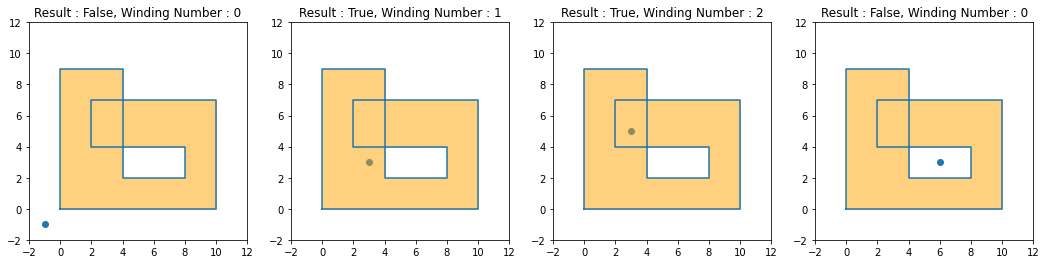

In [187]:
polygon_pts = [[0,0], [10,0], [10,7], [2,7], [2,4], [8,4], [8,2], [4,2], [4,9], [0,9], [0,0]]
polygon = Polygon(polygon_pts)
pts = [[-1,-1], [3,3], [3,5], [6,3]]

fig, ax = plt.subplots(1, 4, figsize=(18, 4))
for i in range(4):
    point = Point(pts[i])
    ax[i].set_xlim(-2, 12)
    ax[i].set_ylim(-2, 12)
    ax[i].plot(*polygon.boundary.xy)
    ax[i].fill(*polygon.boundary.xy, color='orange', alpha=0.5)
    ax[i].scatter(point.x, point.y)
#     result, number = crossing_number(pt, polygons[i])
    result, number = winding_number(point, polygon_pts)
    ax[i].set_title(f'Result : {result}, Winding Number : {number}')

plt.show()

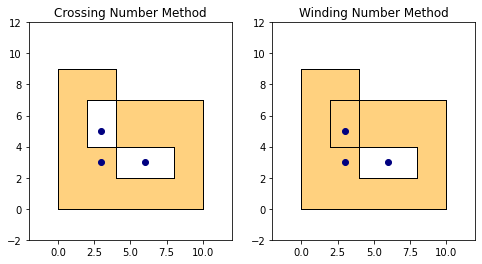

In [244]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

polygon_pts = [[0,0], [10,0], [10,7], [2,7], [2,4], [8,4], [8,2], [4,2], [4,9], [0,9], [0,0]]
polygon = Polygon(polygon_pts)

br = Polygon([[0,0], [10,0], [10,7], [4,7], [4,9], [0,9], [0,0]])
sr1 = Polygon([[4,2], [8,2], [8,4], [4,4], [4,2]])
sr2 = Polygon([[2,4], [4,4], [4,7], [2,7], [2,4]])
pts = [[3,3], [3,5], [6,3]]
ax[0].fill(*br.boundary.xy, color='orange', alpha=0.5)
ax[0].fill(*sr1.boundary.xy, color='white', zorder=1)
ax[0].fill(*sr2.boundary.xy, color='white', zorder=1)
ax[1].fill(*polygon.boundary.xy, color='orange', alpha=0.5)

for i in range(2):
    for j in range(len(pts)):
        ax[i].set_xlim(-2, 12)
        ax[i].set_ylim(-2, 12)
        ax[i].plot(*polygon.boundary.xy, color='k', linewidth=1)
        ax[i].scatter(pts[j][0], pts[j][1], color='navy', zorder=2)

ax[0].set_title("Crossing Number Method")
ax[1].set_title("Winding Number Method")
plt.show()

만약 폴리곤이 간단하다면(예, 스스로 겹치는 경우가 없음), 이 두 방법은 모든 점들에 대해 같은 결과를 줄 것이다. 하지만 위의 도형처럼 시계방향 or 반시계방향처럼 하나의 방향으로 계속 전개되지 않고, 방향이 변화하는 폴리곤이면서 그로 인해 겹치는 영역이 발생하는 경우 폴리곤의 내외부의 판단이 두가지 경우로 가능하다.

[[2,4], [4,4], [4,7], [2,7], [2,4]] 부분에 대해 Crossing Number를 사용한 경우 바깥에 있다고 나오지만, Winding Number를 사용할 시 내부에 존재한다. 

또한 위와 같이 색이나 다른 방법으로 구분하지 않는다면 해당 부분에 대한 내외부 판단이 더욱 어려울 것이다. 폴리곤의 전체 좌표를 통해 겹친영역을 구분한다고 하면, 겹친 영역에서의 점들은 wn=2를 가지며 폴리곤 안에 두번 중복해서 내부에 위치함을 나타낸다. 즉, wn이 cn보다 더 직관적인 답을 준다고 볼 수 있다.

관련 refer : https://www.ijemin.com/blog

#### 정확도 분석

단순 폴리곤에 대해 어느정도의 정확도의 내외부 판단을 하는지에 대해,
가장 정확한 측정을 위해서는 모든 판단 경우에 대해 답을 가지고 진행해야 하지만, 그 과정이 너무 많은 시간과 노력이 소모되고 위의 과정에서 오판단이 우려되는 일부 경우들을 먼저 시험했기 때문에 cn(crossing number method)과 wn(winding number method) 두 방법이 모두 틀렸다는 상황을 제외하고 진행함

첫번째로 100번의 랜덤 폴리곤(꼭지점의 개수는 고정)과 랜덤 점을 생성하고 각 경우에 대해 cn과 wn을 수행하여 서로 결과값이 다를 경우(True & False) 해당 랜덤 폴리곤과 랜덤 점의 좌표를 리스트에 저장하고 완료된 리스트들을 다시 판단하는 방법으로 진행


In [282]:
i = 0
diff_list = []

while i < 100:
    
    # 랜덤 폴리곤 생성
    pts_1 = making_pts(0, 10, 5)
    pts_2 = making_Polygon(pts_1)
    pts_2.append(pts_2[0])
    polygon = Polygon(pts_2)

    # 랜덤 점 생성
    p = [rd.randint(-1, 11), rd.randint(-1, 11)]
    point = Point(p)
    
    # 점, 폴리곤 내외부 판단 함수 수행(cn, wn )
    result_cn, cn = crossing_number(point, pts_2)
    result_wn, wn = winding_number(point, pts_2)
    
    # cn, wn 값이 다를 경우 리스트에 추가
    if result_cn != result_wn:
        diff_list.append([p, pts_2, result_cn, result_wn])
    
    i += 1

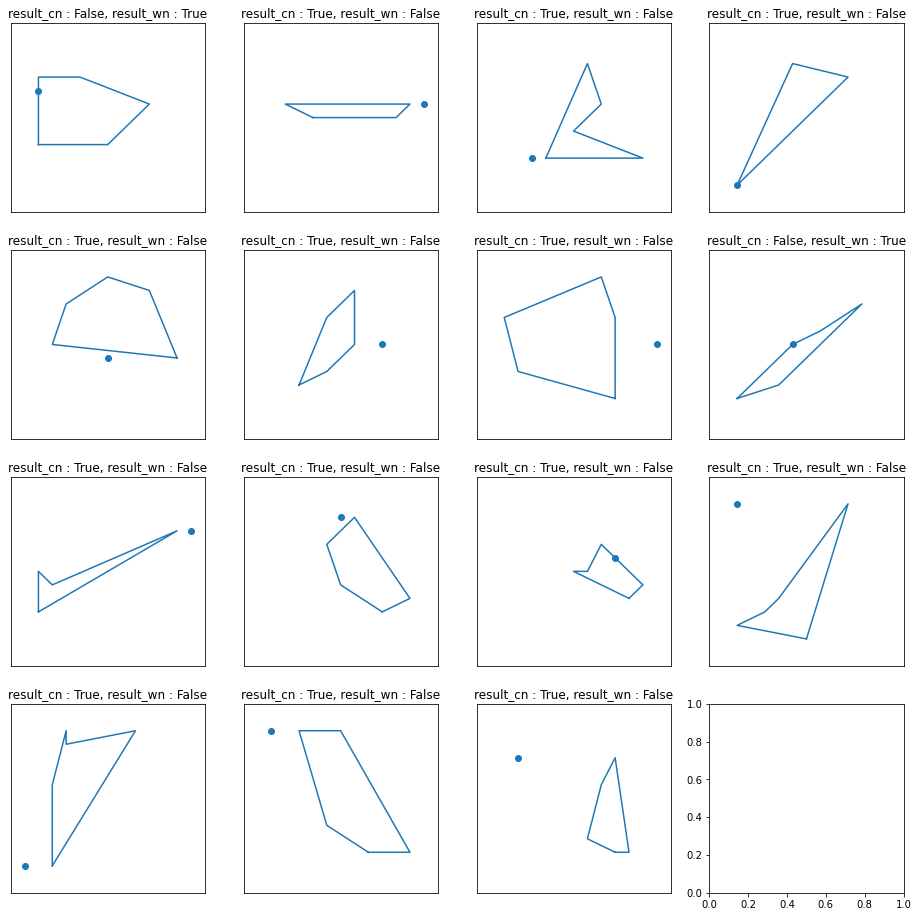

In [283]:
# len(diff_list)에 따른 출력 플롯의 4 * n의 n 도출
if len(diff_list) % 4 == 0:
    n = len(diff_list) // 4
else:
    n = (len(diff_list) // 4) + 1

fig, ax = plt.subplots(n, 4, figsize=(16, n*4))

for i in range(n):
    for j in range(4):
        if (i*4)+j < len(diff_list):
            pt = diff_list[(i*4)+j][0]
            polygon_pts = diff_list[(i*4)+j][1]
            result_cn = diff_list[(i*4)+j][2]
            result_wn = diff_list[(i*4)+j][3]
            point = Point(pt)
            polygon = Polygon(polygon_pts)

            ax[i][j].plot(*polygon.boundary.xy)
            ax[i][j].scatter(point.x, point.y)
            ax[i][j].set_xlim(-2, 12)
            ax[i][j].set_ylim(-2, 12)
            ax[i][j].set_xticks([])
            ax[i][j].set_yticks([])
            ax[i][j].set_title(f'result_cn : {result_cn}, result_wn : {result_wn}')

plt.show()

서로 다른경우

1. 선에 걸친 경우 (cn과 wn의 값이 비일관적임)<br>
cn == False and wn == True : #1, #8 <br>
cn == True and wn == False : #4, #11 <br>
<br>
2. 폴리곤 외부에 있는 점의 수평선(vector)이 폴리곤 어느 꼭지점과 동일선상일때 (일관적)<br>
cn == True and wn == False: #2, #3, #5, #6, #7, #9, #10, #12, #13, #14, #15 <br>
보통 점의 우측 방향 즉, +x 축으로 수평선을 진행시키는데 점의 x좌표가 폴리곤의 x최대값보다 클 때도 폴리곤의 x최대값과 점의 x값을 연결하기 때문에 -x방향의 수평선이 생기고 cn 검토를 함.
이를 해결하기 위해 점의 좌표와 폴리곤의 maxx, maxy, minx, miny 좌표들의 관계 선검토가 필요

In [290]:
# 수정

def crossing_number(point, polygon_pts):
    number = 0
    px, py = point.x, point.y
    polygon = Polygon(polygon_pts)
    minx, miny, maxx, maxy = polygon.bounds
    # px > maxx 경우 점은 폴리곤 외부에 위치
    if px < minx or px > maxx:
        return False, number
    # py < minx or py > maxx 경우 폴리곤 외부에 위치
    if py < minx or py > maxx:
        return False, number
    
    for i in range(len(polygon_pts)-1):
        result = check_cross([px, py, maxx, py, polygon_pts[i][0], polygon_pts[i][1], polygon_pts[i+1][0], polygon_pts[i+1][1]])
        if result == True:
            number += 1
            
    if number % 2 == 1:
        return True, number
    else:
        return False, number

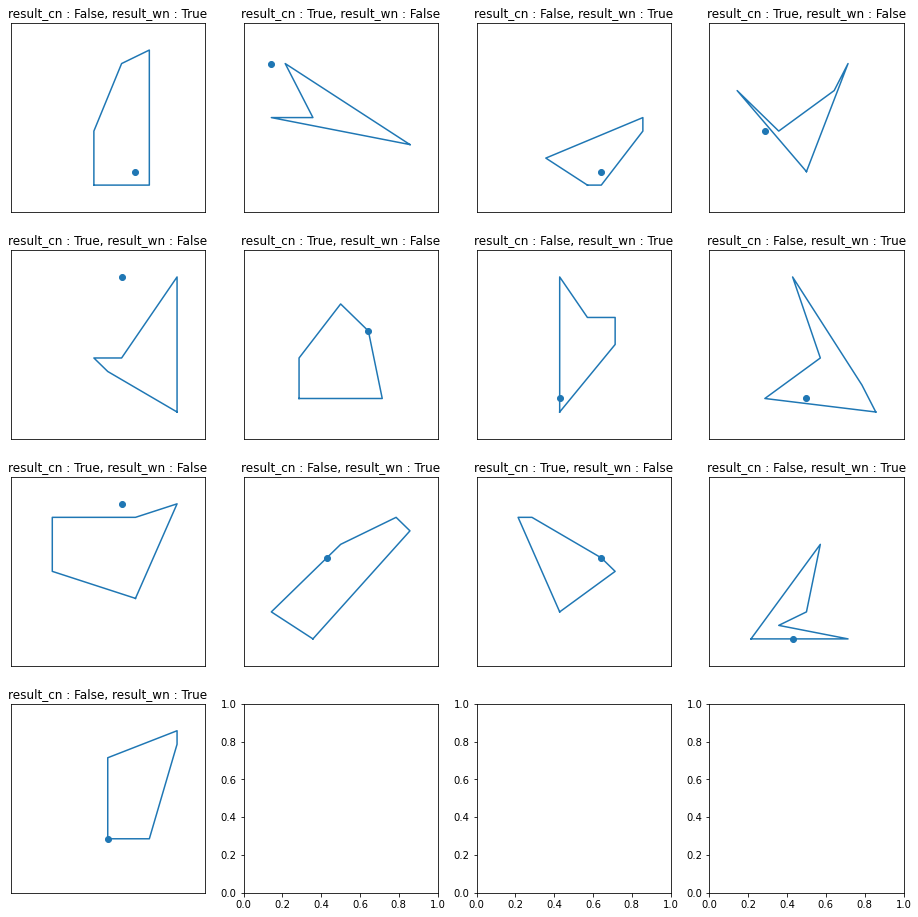

In [295]:
i = 0
diff_list = []

while i < 100:
    
    # 랜덤 폴리곤 생성
    pts_1 = making_pts(0, 10, 5)
    pts_2 = making_Polygon(pts_1)
    pts_2.append(pts_2[0])
    polygon = Polygon(pts_2)

    # 랜덤 점 생성
    p = [rd.randint(-1, 11), rd.randint(-1, 11)]
    point = Point(p)
    
    # 점, 폴리곤 내외부 판단 함수 수행(cn, wn )
    result_cn, cn = crossing_number(point, pts_2)
    result_wn, wn = winding_number(point, pts_2)
    
    # cn, wn 값이 다를 경우 리스트에 추가
    if result_cn != result_wn:
        diff_list.append([p, pts_2, result_cn, result_wn])
    
    i += 1
    
    
if len(diff_list) % 4 == 0:
    n = len(diff_list) // 4
else:
    n = (len(diff_list) // 4) + 1

fig, ax = plt.subplots(n, 4, figsize=(16, n*4))

for i in range(n):
    for j in range(4):
        if (i*4)+j < len(diff_list):
            pt = diff_list[(i*4)+j][0]
            polygon_pts = diff_list[(i*4)+j][1]
            result_cn = diff_list[(i*4)+j][2]
            result_wn = diff_list[(i*4)+j][3]
            point = Point(pt)
            polygon = Polygon(polygon_pts)

            ax[i][j].plot(*polygon.boundary.xy)
            ax[i][j].scatter(point.x, point.y)
            ax[i][j].set_xlim(-2, 12)
            ax[i][j].set_ylim(-2, 12)
            ax[i][j].set_xticks([])
            ax[i][j].set_yticks([])
            ax[i][j].set_title(f'result_cn : {result_cn}, result_wn : {result_wn}')

plt.show()

..ing